# Test Human Origin Projections on Leipzig Server

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
    
if socket_name.startswith("bionc") or socket_name.startswith("hpc"):
    print("Leipzig Cluster detected!")
    #path = "/mnt/archgen/users/hringbauer/git/projectPCA/"   
    path = "/mnt/archgen/users/hringbauer/"
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
     
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version_info)

#from projectPCA.eigenstrat_funcs import load_genos_autoeager, update_values
from projectPCA.run import project_eigenstrat
from projectPCA.get_proj_files import get_projection_files

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

Leipzig Cluster detected!
/mnt/archgen/users/hringbauer
CPU Count: 128
sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


In [2]:
def test_SUA002_proj():
    df_proj= project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="HO", es_type="default")
    assert(len(df_proj)==1)
    pc1, pc2, nsnps = df_proj[["pc1", "pc2", "#SNP"]].values[0]
    assert(np.isclose(pc1, -0.011584))
    assert(np.isclose(pc2, -0.-0.06484))
    assert(nsnps==334433)

    print("Test passed!")

def test_SUA002_proj_autoeager():
    df_proj= project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   pca="HO", es_type="autoeager", plot=False)
    assert(len(df_proj)==1)
    pc1, pc2, nsnps = df_proj[["pc1", "pc2", "#SNP"]].values[0]
    assert(np.isclose(pc1, -0.011584))
    assert(np.isclose(pc2, -0.-0.06484))
    assert(nsnps==334433)

    print("Test passed!")

def test_preloading_HO_proj():
    df_snp = pd.read_csv("/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double.snp", header=None,
                     sep="\t", engine="python")
    df_snp.columns = ["snp", "chr", "map",
                      "pos", "ref", "alt"]  # Set the Columns

    pf = get_projection_files("HO") # Load the pre-computed PC Object
    dfw = pf.get_snp_weights()
    df_bgrd_pcs = pf.get_projections_ref()

    df_proj = project_eigenstrat(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
                   df_snp=df_snp, dfw=dfw, df_bgrd_pcs=df_bgrd_pcs, plot=False,
                   es_type="autoeager")

    assert(len(df_proj)==1)
    pc1, pc2, nsnps = df_proj[["pc1", "pc2", "#SNP"]].values[0]
    assert(np.isclose(pc1, -0.011584))
    assert(np.isclose(pc2, -0.-0.06484))
    assert(nsnps==334433)

    print("Test passed!")

def test_punic_es_proj():
    df_proj = project_eigenstrat(es_path="/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k",
                            iids = ["I18202", "I11806","I35342"], plot=True,
                            es_type="default")

    assert(len(df_proj)==3)

    pc1, pc2, nsnps = df_proj[["pc1", "pc2", "#SNP"]].values[1]
    assert(np.isclose(pc1, 0.057955))
    assert(np.isclose(pc2, -1.89606907e-02))
    assert(nsnps==47954)

    print("Test passed!")

def test_all():
    """Run all the tests"""
    test_SUA002_proj() # Default 
    test_SUA002_proj_autoeager()
    test_preloading_HO_proj()
    test_punic_es_proj()
    print("All tests passed!")

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528/531927 fixed SNPs.


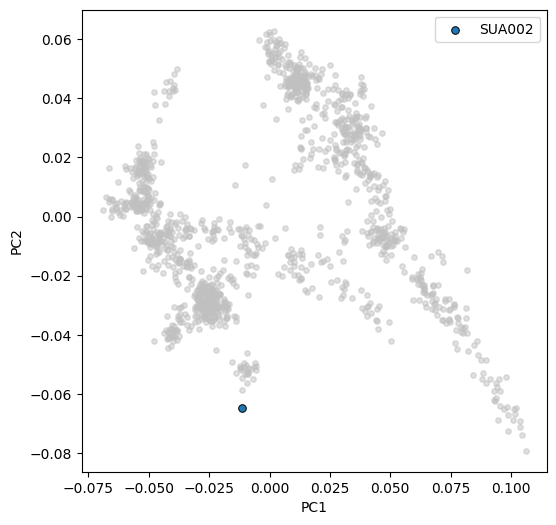

Test passed!
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528/531927 fixed SNPs.
Test passed!
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528/531927 fixed SNPs.
Test passed!
Eigenstrat packed: True
3 Eigenstrat Files with 208 Individuals and 1207104 SNPs
Filtering 130447/518388 fixed SNPs.


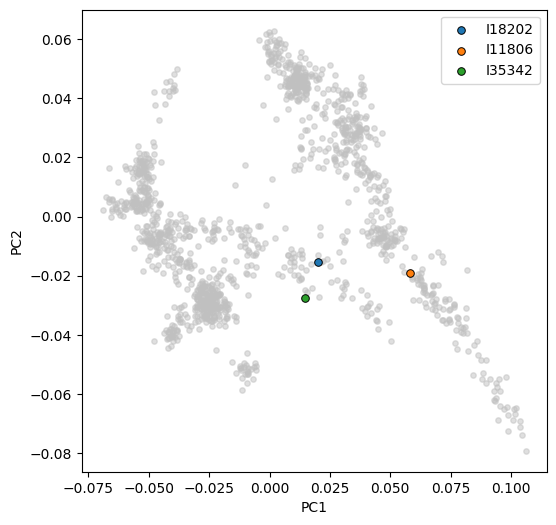

Test passed!
All tests passed!


In [3]:
test_all()